In [1]:
import networkx as nx 
import matplotlib.pyplot as plt
import pathlib
import numpy as np 

In [2]:
NODE = {'font_color': 'black', 'node_color': 'white', 'with_labels': True}
EDGE = {'edgecolors': 'black', 'edge_color': 'black', 'width': 1.5} 

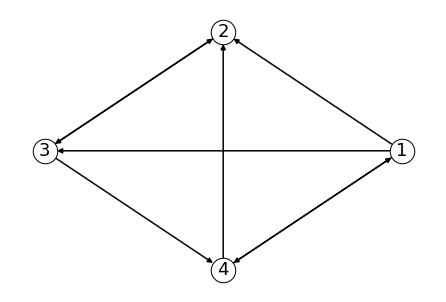

In [3]:
root = pathlib.Path(r'E:\Prog\3kurs\omo\lab3')
fname = root.joinpath('g.txt')
Graph = nx.read_adjlist(fname, create_using=nx.DiGraph)

nx.draw_circular(Graph, **NODE, **EDGE, font_size= 18, node_size = 600)

In [4]:
edgs = Graph.in_edges
print(edgs)

[('4', '1'), ('1', '2'), ('3', '2'), ('4', '2'), ('1', '3'), ('2', '3'), ('1', '4'), ('3', '4')]


In [5]:
n = nx.number_of_nodes(Graph)

In [6]:
d = Graph.out_degree
print(d)

[('1', 3), ('2', 1), ('3', 2), ('4', 2)]


In [7]:
G = nx.to_dict_of_lists(Graph)
print(G)

{'1': ['2', '3', '4'], '2': ['3'], '3': ['2', '4'], '4': ['1', '2']}


In [8]:
A = np.zeros((n, n))
for x, y in edgs:
    A[int(y)-1][int(x)-1] = 1 / d[x]
print(A)

[[0.         0.         0.         0.5       ]
 [0.33333333 0.         0.5        0.5       ]
 [0.33333333 1.         0.         0.        ]
 [0.33333333 0.         0.5        0.        ]]


In [50]:
B = np.array([[1 / n for j in range(n)] for i in range(n)])
a = 0.85
e = 10**(-10)

In [10]:
M = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        M[i][j] = a * A[i][j] + (1-a) * B[i][j]
print(M)

[[0.0375     0.0375     0.0375     0.4625    ]
 [0.32083333 0.0375     0.4625     0.4625    ]
 [0.32083333 0.8875     0.0375     0.0375    ]
 [0.32083333 0.0375     0.4625     0.0375    ]]


In [61]:
def method(n, M, e):
    x = np.array([1 / n for j in range(n)])
    x_1 = np.copy(x)
    norm = 1
    while norm >= e:
        for i in range(n):
            s = 0
            snorm = 0
            for j in range(n):
                s += M[i][j] * x[j]
            x_1[i] = s
            snorm += abs(x_1[i]-x[i])**2
        norm = snorm**(1/2) 
        x = x_1
    return(x)

method(n, M, e)          



array([0.12869792, 0.30095204, 0.32846364, 0.21253759])